In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [48]:
#printed column info for measurement table
inspector.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [49]:
# printed column info for station
inspector.get_columns('station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [49]:
# data = engine.execute("SELECT * FROM 'Station';")
# for row in data:
#     print(row)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


# Exploratory Precipitation Analysis

In [55]:
# Find the most recent date in the data set.

most_recent_dt = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(most_recent_dt)

('2017-08-23',)


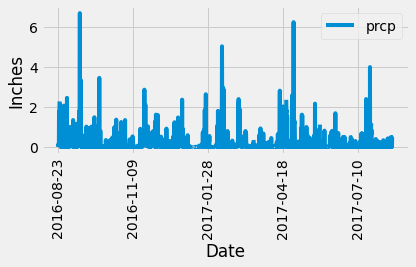

In [47]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
year_prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-22').order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
yr_prcp_data_df = pd.DataFrame(year_prcp_data)
yr_prcp_data_df.columns = ['date', 'prcp']
yr_prcp_df = yr_prcp_data_df.set_index('date')
yr_prcp_df

# Sort the dataframe by date. Note it was already in ascending order, but wrote code below to use if it hadn't been.
# yr_prcp_df.sort_values(by='date')
# yr_prcp_df

# Use Pandas Plotting with Matplotlib to plot the data

yr_prcp_df.plot()
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()


In [52]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_summary = yr_prcp_df.describe()
prcp_summary

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [54]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.station).count()
total_stations

9

In [66]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(Station.station, func.count(Measurement.station)).order_by(func.count(Measurement.station).desc()).group_by(Measurement.station).all()
station_activity

/Users/annmarie/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SAWarning: SELECT statement has a cartesian product between FROM element(s) "measurement" and FROM element "station".  Apply join condition(s) between each element to resolve.
  This is separate from the ipykernel package so we can avoid doing imports until


[('USC00519397', 24948),
 ('USC00519397', 24516),
 ('USC00519397', 24381),
 ('USC00519397', 24021),
 ('USC00519397', 23508),
 ('USC00519397', 19818),
 ('USC00519397', 17811),
 ('USC00519397', 12348),
 ('USC00519397', 4599)]

In [74]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# do the same as above except use .first instead of .all name as new variable to use for calculations
most_active_entry = session.query(Station.station, func.count(Measurement.station)).order_by(func.count(Measurement.station).desc()).group_by(Measurement.station).first()
most_active_entry

#narrow down to station number
most_active_number = most_active_entry[0]
most_active_number

lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_number).first()
print(f'The lowest temperature for the most active station is {lowest_temp}')

highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_number).first()
print(f'The highest temperature for the most active station is {highest_temp}')
    
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_number).first()
print(f'The average temperature for the most active station is {avg_temp}')


The lowest temperature for the most active station is (56.0,)
The highest temperature for the most active station is (87.0,)
The average temperature for the most active station is (74.55323054331865,)


In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()